In [6]:
options(scipen=999)
#loading necessary packages
options(scipen=999)
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(purrr))
suppressPackageStartupMessages(library(VennDiagram))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(ggmanh))
suppressPackageStartupMessages(library(cowplot))

In [2]:
#reading the summary stats files
diamante18 <- fread("/lustre/groups/itg/teams/zeggini/users/archit.singh/lambda/summary_statistics/T2D/Mahajan.NatGenet2018b.T2D.European.undajusted.BMI/same_variants_DIAMANTE_18.txt", header = TRUE)
diamante22 <- fread("/lustre/groups/itg/teams/zeggini/users/archit.singh/lambda/summary_statistics/T2D/Mahajan.NatGen2022.DIAMANTE-EUR.sumstat/same_variants_DIAMANTE_22.txt", header = TRUE)
t2dggi <- fread("/lustre/groups/itg/teams/zeggini/users/archit.singh/lambda/summary_statistics/T2D/T2DGGI/same_variants_T2DGGI_24.txt", header = TRUE)

In [3]:
head(diamante18)
head(diamante22)
head(t2dggi)

SNP,Chr,Pos,EA,NEA,EAF,Beta,SE,Pvalue,Neff,id,single_gc_p_values
<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<dbl>
1:100000012,1,100000012,t,g,0.2500,-0.0260,0.0073,4.0e-04,231420,chr1:100000012:t:g,0.0003666127
1:10000006,1,10000006,a,g,0.0047,-0.0380,0.0560,4.9e-01,225429,chr1:10000006:a:g,0.4871923423
1:100000827,1,100000827,t,c,0.3000,-0.0230,0.0069,7.5e-04,231420,chr1:100000827:t:c,0.0006926919
1:100000843,1,100000843,t,c,0.9400,0.0006,0.0140,9.7e-01,231420,chr1:100000843:t:c,0.9698057222
1:100001138,1,100001138,a,g,0.9700,-0.0041,0.0220,8.6e-01,230619,chr1:100001138:a:g,0.8591023957
1:100001201,1,100001201,t,g,0.1000,-0.0170,0.0099,8.9e-02,231420,chr1:100001201:t:g,0.0869491490


chromosome(b37),position(b37),chrposID,rsID,effect_allele,other_allele,effect_allele_frequency,Fixed-effects_beta,Fixed-effects_SE,Fixed-effects_p-value,id,single_gc_p_values
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,693731,chr1:693731,rs12238997,a,g,0.8747,0.0044,0.0119,0.7124,chr1:693731:a:g,0.6995531
1,706368,chr1:706368,rs55727773,a,g,0.4964,0.0118,0.0099,0.2355,chr1:706368:a:g,0.2142558
1,721290,chr1:721290,rs12565286,c,g,0.0359,-0.0176,0.0262,0.5013,chr1:721290:c:g,0.4814430
1,729679,chr1:729679,rs4951859,c,g,0.1656,-0.0043,0.0105,0.6813,chr1:729679:c:g,0.6672311
1,730087,chr1:730087,rs148120343,t,c,0.9409,0.0001,0.0172,0.9954,chr1:730087:t:c,0.9951843
1,731718,chr1:731718,rs142557973,t,c,0.8694,0.0088,0.0111,0.4278,chr1:731718:t:c,0.4064529


MarkerName,Allele1,Allele2,Freq1,FreqSE,MinFreq,MaxFreq,Effect,StdErr,P-value,Direction,HetISq,HetChiSq,HetDf,HetPVal,id
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>
chr11:88249377,t,c,0.9921,0.0018,0.9881,0.9972,-0.0337,0.0214,0.1146,---++--+-+---+-+++-----+++-+------++,25.7,47.089,35,0.08327,chr11:88249377:t:c
chr8:135908647,a,g,0.2034,0.0176,0.1449,0.2956,-0.0020,0.0046,0.6633,++-+-+---+++--+---------++-++++--+++,20.1,43.801,35,0.14620,chr8:135908647:a:g
chr12:3871714,a,c,0.9979,0.0009,0.9973,1.0000,-0.0678,0.0918,0.4603,--??+??-+??????????-+--???-??????-??,0.0,9.532,10,0.48250,chr12:3871714:a:c
chr11:97895884,c,g,0.0554,0.0061,0.0369,0.0828,0.0215,0.0081,0.007924,+++-++++-+-+--++-+----++-++--+++++-+,3.0,36.087,35,0.41750,chr11:97895884:c:g
chr7:8327736,a,t,0.9940,0.0027,0.9921,1.0000,0.0055,0.0454,0.9032,-++?-+?--+?-???--??+--++??-?????+--?,0.0,9.576,19,0.96260,chr7:8327736:a:t
chr18:814730,c,g,0.8867,0.0088,0.8699,0.9187,-0.0043,0.0059,0.4592,++-+-++-+--+-+-+-----++----+----+++-,0.0,28.836,35,0.75930,chr18:814730:c:g


In [4]:
#adding another column indicating direction of effect (1 for positive beta, 0 for negative beta)                      
diamante18$direction_of_effect <- rep(1, length(diamante18$id))
diamante18$direction_of_effect[diamante18$Beta < 0] <- 0
diamante22$direction_of_effect <- rep(1, length(diamante22$id))
diamante22$direction_of_effect[diamante22$`Fixed-effects_beta` < 0] <- 0
t2dggi$direction_of_effect <- rep(1, length(t2dggi$id))
t2dggi$direction_of_effect[t2dggi$Effect < 0] <- 0

In [5]:
#Correcting the P-values using the LDSR-intercept
intercept1 <- c(1.097)
chisq <- qchisq(as.numeric(diamante18$single_gc_p_values),1,lower.tail=FALSE)
newchisq_intercept <- chisq/intercept1
newpvalues <- pchisq(newchisq_intercept, df=1,lower.tail=FALSE)
diamante18$intercept_adj_p_values <- newpvalues

intercept2 <- c(1.0918)
chisq <- qchisq(as.numeric(diamante22$single_gc_p_values),1,lower.tail=FALSE)
newchisq_intercept <- chisq/intercept2
newpvalues <- pchisq(newchisq_intercept, df=1,lower.tail=FALSE)
diamante22$intercept_adj_p_values <- newpvalues

In [7]:
#Manhattan plots- Before and after LDSR intercept correction
#before correction
diamante18_tmp <- diamante18
diamante22_tmp <- diamante22
diamante18_tmp$Pvalue <- as.numeric(diamante18_tmp$Pvalue)
diamante22_tmp$`Fixed-effects_p-value` <- as.numeric(diamante22_tmp$`Fixed-effects_p-value`)
plot_1 <- manhattan_plot(x = diamante18_tmp, pval.colname = "single_gc_p_values", chr.colname = "Chr", pos.colname = "Pos", plot.title = "DIAMANTE-18: No correction", y.label = "-log10(P-value)", signif = 0.00000005)
plot_2 <- manhattan_plot(x = diamante18_tmp, pval.colname = "intercept_adj_p_values", chr.colname = "Chr", pos.colname = "Pos", plot.title = "DIAMANTE-18: LDSR intercept correction", y.label = "-log10(P-value)", signif = 0.00000005)
plot_3 <- manhattan_plot(x = diamante22_tmp, pval.colname = "single_gc_p_values", chr.colname = "chromosome(b37)", pos.colname = "position(b37)", plot.title = "DIAMANTE-22: No correction", y.label = "-log10(P-value)", signif = 0.00000005)
plot_4 <- manhattan_plot(x = diamante22_tmp, pval.colname = "intercept_adj_p_values", chr.colname = "chromosome(b37)", pos.colname = "position(b37)", plot.title = "DIAMANTE-22: LDSR intercept correction", y.label = "-log10(P-value)", signif = 0.00000005)
#combining figures
options(repr.plot.width = 14, repr.plot.height =7) 
comb_plot1 <- ggarrange(plot_1, plot_2, plot_3, plot_4, labels = c("A", "B", "C", "D"))
#comb_plot2 <- ggarrange(plot_3, plot_4, labels = c("A", "B"))
comb_plot1

Warning message in replace_0_pval(x[[pval.colname]]):
“Replacing p-value of 0 with the minimum.”
Warning message in replace_0_pval(x[[pval.colname]]):
“Replacing p-value of 0 with the minimum.”
Warning message in replace_0_pval(x[[pval.colname]]):
“Replacing p-value of 0 with the minimum.”
Warning message in replace_0_pval(x[[pval.colname]]):
“Replacing p-value of 0 with the minimum.”


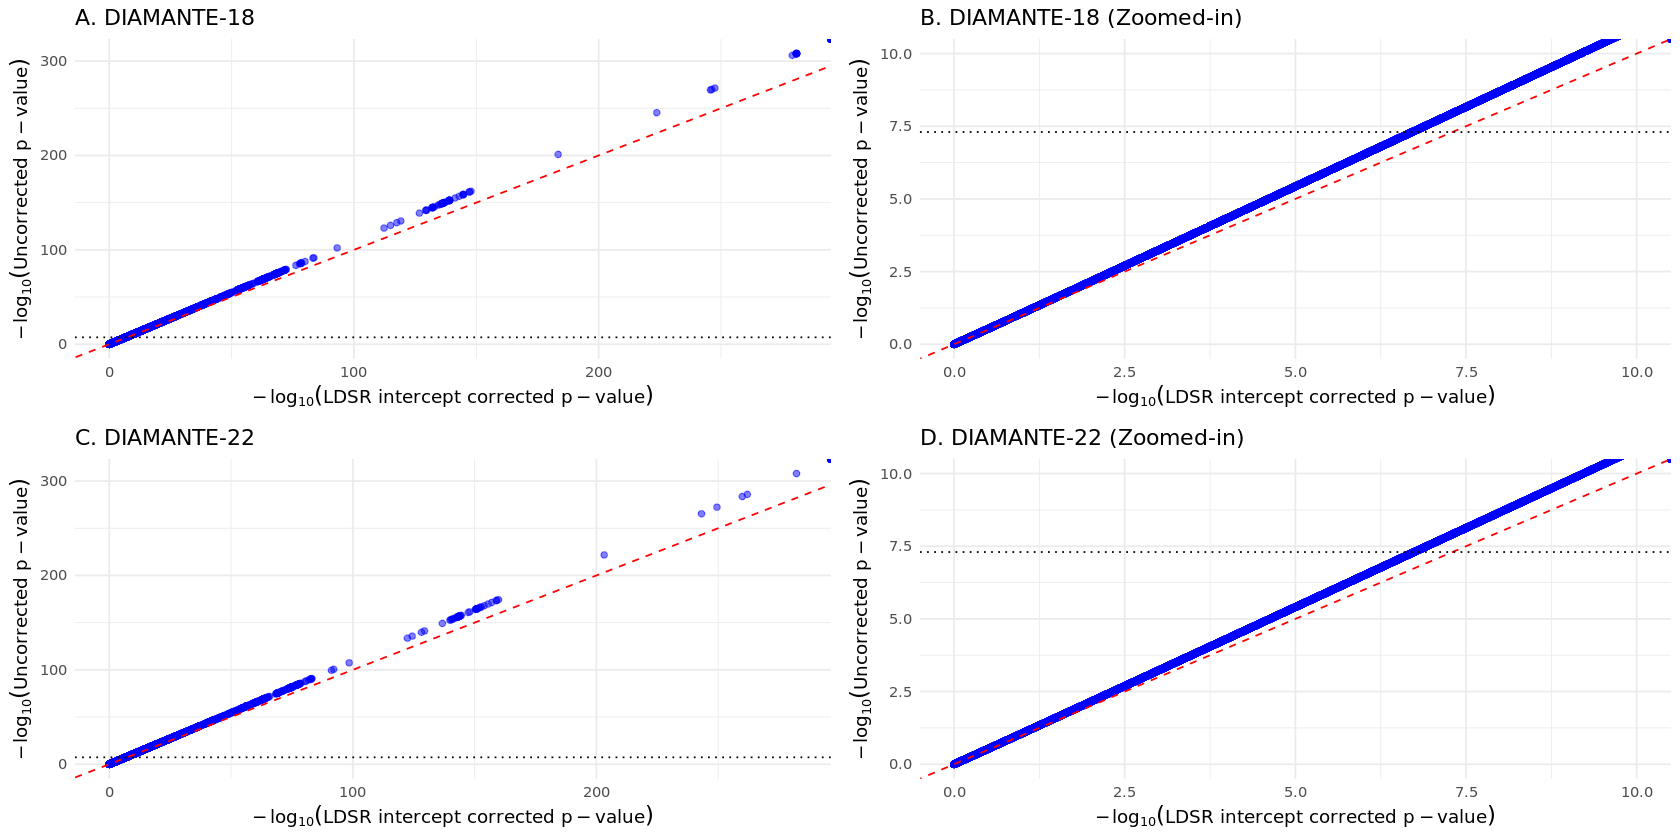

In [9]:
# Define significance threshold
threshold <- -log10(5e-08)

# --- DIAMANTE-18 Plots (LDSR Intercept Correction) ---
qqplot_diam18_ldsr <- ggplot(diamante18, aes(x = -log10(as.numeric(intercept_adj_p_values)), y = -log10(as.numeric(single_gc_p_values)))) +
  geom_point(alpha = 0.5, color = "blue") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  geom_hline(yintercept = threshold, linetype = "dotted", color = "black") +  
  theme_minimal() +
  labs(
    x = expression(-log[10](LDSR~intercept~corrected~p-value)),
    y = expression(-log[10](Uncorrected~p-value)),
    title = "A. DIAMANTE-18"
  )

zoom_qqplot_diam18_ldsr <- ggplot(diamante18, aes(x = -log10(as.numeric(intercept_adj_p_values)), y = -log10(as.numeric(single_gc_p_values)))) +
  geom_point(alpha = 0.5, color = "blue") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  geom_hline(yintercept = threshold, linetype = "dotted", color = "black") +  
  coord_cartesian(ylim = c(0, 10), xlim = c(0, 10)) +  
  theme_minimal() +
  labs(
    x = expression(-log[10](LDSR~intercept~corrected~p-value)),
    y = expression(-log[10](Uncorrected~p-value)),
    title = "B. DIAMANTE-18 (Zoomed-in)"
  )

# --- DIAMANTE-22 Plots (LDSR Intercept Correction) ---
qqplot_diam22_ldsr <- ggplot(diamante22, aes(x = -log10(as.numeric(intercept_adj_p_values)), y = -log10(as.numeric(single_gc_p_values)))) +
  geom_point(alpha = 0.5, color = "blue") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  geom_hline(yintercept = threshold, linetype = "dotted", color = "black") +  
  theme_minimal() +
  labs(
    x = expression(-log[10](LDSR~intercept~corrected~p-value)),
    y = expression(-log[10](Uncorrected~p-value)),
    title = "C. DIAMANTE-22"
  )

zoom_qqplot_diam22_ldsr <- ggplot(diamante22, aes(x = -log10(as.numeric(intercept_adj_p_values)), y = -log10(as.numeric(single_gc_p_values)))) +
  geom_point(alpha = 0.5, color = "blue") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  geom_hline(yintercept = threshold, linetype = "dotted", color = "black") +  
  coord_cartesian(ylim = c(0, 10), xlim = c(0, 10)) +  
  theme_minimal() +
  labs(
    x = expression(-log[10](LDSR~intercept~corrected~p-value)),
    y = expression(-log[10](Uncorrected~p-value)),
    title = "D. DIAMANTE-22 (Zoomed-in)"
  )

# Combine all four plots into a 2x2 layout
final_qqplot_ldsr <- plot_grid(qqplot_diam18_ldsr, zoom_qqplot_diam18_ldsr, qqplot_diam22_ldsr, zoom_qqplot_diam22_ldsr, 
                               ncol = 2, nrow = 2, labels = NULL)
final_qqplot_ldsr

In [15]:
#finding variants analysed commonly between the 4 datasets
diamante18_snps <- data.frame(diamante18$id)
colnames(diamante18_snps) <- c("id")
diamante22_snps <- data.frame(diamante22$id)
colnames(diamante22_snps) <- c("id")
t2dggi_snps <- data.frame(t2dggi$id)
colnames(t2dggi_snps) <- c("id")
dataset_list_1 <- list(diamante18_snps, diamante22_snps)
dataset_list_2 <- list(diamante18_snps, t2dggi_snps)
dataset_list_3 <- list(diamante22_snps, t2dggi_snps)

comm_snps_1 <- reduce(dataset_list_1, inner_join)
comm_snps_2 <- reduce(dataset_list_2, inner_join)
comm_snps_3 <- reduce(dataset_list_3, inner_join)

Joining with `by = join_by(id)`
Joining with `by = join_by(id)`
Joining with `by = join_by(id)`


In [16]:
#comparing Diamante-18 and Diamante-22
diamante18_comm_1 <- semi_join(diamante18, comm_snps_1, by = "id")
diamante22_comm_1 <- semi_join(diamante22, comm_snps_1, by = "id")
#LDSR-interscept unadjusted
#For DIAMANTE-18
sig_diamante18_comm_1 <- subset(diamante18_comm_1, as.numeric(diamante18_comm_1$single_gc_p_values) <= 0.00000005)
#For DIAMANTE-22
sig_diamante22_comm_1 <- subset(diamante22_comm_1, as.numeric(diamante22_comm_1$single_gc_p_values) <= 0.00000005)

#calculating rate of replication
#including all variants
overlap_unadj <- inner_join(sig_diamante18_comm_1, sig_diamante22_comm_1, by = "id")
overlap_unadj <- subset(overlap_unadj, overlap_unadj$direction_of_effect.x == overlap_unadj$direction_of_effect.y)
print(dim(overlap_unadj))
replication100_unadj <- (length(overlap_unadj$id)/length(sig_diamante18_comm_1$id)*100)

#LDSR-intercept adjusted
#For DIAMANTE-18
sig_adj_diamante18_comm_1 <- subset(diamante18_comm_1, as.numeric(diamante18_comm_1$intercept_adj_p_values) <= 0.00000005)
#including all variants
overlap_adj <- inner_join(sig_adj_diamante18_comm_1, sig_diamante22_comm_1, by = "id")
overlap_adj <- subset(overlap_adj, overlap_adj$direction_of_effect.x == overlap_adj$direction_of_effect.y)
print(dim(overlap_adj))
replication100_adj <- (length(overlap_adj$id)/length(sig_diamante18_comm_1$id)*100)

#Before LDSR-intercept-correction
TP <- length(overlap_unadj$id)

#TN
unsig_unadj_diamante18 <- subset(diamante18_comm_1, as.numeric(diamante18_comm_1$single_gc_p_values) > 0.00000005)
unsig_unadj_diamante22 <- subset(diamante22_comm_1, as.numeric(diamante22_comm_1$single_gc_p_values) > 0.00000005)
common_unsig_unadj <- inner_join(unsig_unadj_diamante18, unsig_unadj_diamante22, by = "id")
TN <- length(common_unsig_unadj$id)

#FP
FP_temp1 <- inner_join(sig_diamante18_comm_1, unsig_unadj_diamante22, by = "id")
FP_temp2 <- inner_join(sig_diamante18_comm_1, sig_diamante22_comm_1, by = "id")
FP_temp2 <- subset(FP_temp2, FP_temp2$direction_of_effect.x != FP_temp2$direction_of_effect.y)
FP_temp <- rbind(FP_temp1, FP_temp2)
FP_temp_duplicates <- duplicated(FP_temp$id)
FP_temp <- FP_temp[!FP_temp_duplicates, ]
FP <- length(FP_temp$id)

#FN
FN_temp <- inner_join(unsig_unadj_diamante18, sig_diamante22_comm_1, by = "id")
FN <- length(FN_temp$id)

#Calculating rates
FPR_beforeGC <- FP / (FP + TN)
#TPR or Recall
TPR_beforeGC <- TP / (TP + FN)
#Precision 
precision_beforeGC <- TP / (TP + FP)

#After LDSR-intercept-correction
TP <- length(overlap_adj$id)

#TN
unsig_adj_diamante18 <- subset(diamante18_comm_1, as.numeric(diamante18_comm_1$intercept_adj_p_values) > 0.00000005)
common_unsig_adj <- inner_join(unsig_adj_diamante18, unsig_unadj_diamante22, by = "id")
TN <- length(common_unsig_adj$id)

#FP
FP_temp1 <- inner_join(sig_adj_diamante18_comm_1, unsig_unadj_diamante22, by = "id")
FP_temp2 <- inner_join(sig_adj_diamante18_comm_1, sig_diamante22_comm_1, by = "id")
FP_temp2 <- subset(FP_temp2, FP_temp2$direction_of_effect.x != FP_temp2$direction_of_effect.y)
FP_temp <- rbind(FP_temp1, FP_temp2)
FP_temp_duplicates <- duplicated(FP_temp$id)
FP_temp <- FP_temp[!FP_temp_duplicates, ]
FP <- length(FP_temp$id)

#FN
FN_temp <- inner_join(unsig_adj_diamante18, sig_diamante22_comm_1, by = "id")
FN <- length(FN_temp$id)

#Calculating rates
#FPR
FPR_afterGC <- FP / (FP + TN)
#TPR or Recall
TPR_afterGC <- TP / (TP + FN)
#Precision 
precision_afterGC <- TP / (TP + FP)

#identifying true associations not replicated 
unreplicated_diam18_diam22 <- anti_join(overlap_unadj, overlap_adj, by = "id")
#identifying true associations replicated 
replicated_diam18_diam22 <- semi_join(overlap_unadj, overlap_adj, by = "id")

[1] 18266    27
[1] 15757    27


In [17]:
FPR_beforeGC
TPR_beforeGC
precision_beforeGC
FPR_afterGC
TPR_afterGC
precision_afterGC
sig_t2dggi <- subset(t2dggi, as.numeric(t2dggi$`P-value`) <= 0.00000005)
dim(semi_join(unreplicated_diam18_diam22, sig_t2dggi, by = "id"))

[1] 0.0001036224

[1] 0.8729271

[1] 0.9450538

[1] 0.00001892914

[1] 0.7530227

[1] 0.9878378

[1] 2367   27

In [18]:
#comparing Diamante-18 and T2D-GGI
diamante18_comm_2 <- semi_join(diamante18, comm_snps_2, by = "id")
t2dggi_comm_1 <- semi_join(t2dggi, comm_snps_2, by = "id")
#LDSR-intercept unadjusted
#For DIAMANTE-18
sig_diamante18_comm_2 <- subset(diamante18_comm_2, as.numeric(diamante18_comm_2$single_gc_p_values) <= 0.00000005)
#For T2DGGI
sig_t2dggi_comm_1 <- subset(t2dggi_comm_1, as.numeric(t2dggi_comm_1$`P-value`) <= 0.00000005)
#calculating rate of replication
#including all variants
overlap_unadj <- inner_join(sig_diamante18_comm_2, sig_t2dggi_comm_1, by = "id")
overlap_unadj <- subset(overlap_unadj, overlap_unadj$direction_of_effect.x == overlap_unadj$direction_of_effect.y)
print(dim(overlap_unadj))
replication101_unadj <- (length(overlap_unadj$id)/length(sig_diamante18_comm_2$id)*100)

#LDSR-intercept adjusted
#For DIAMANTE-18
sig_adj_diamante18_comm_2 <- subset(diamante18_comm_2, as.numeric(diamante18_comm_2$intercept_adj_p_values) <= 0.00000005)
#calculating rate of replication
#including all variants
overlap_adj <- inner_join(sig_adj_diamante18_comm_2, sig_t2dggi_comm_1, by = "id")
overlap_adj <- subset(overlap_adj, overlap_adj$direction_of_effect.x == overlap_adj$direction_of_effect.y)
print(dim(overlap_adj))
replication101_adj <- (length(overlap_adj$id)/length(sig_diamante18_comm_2$id)*100)

#Before GC-correction
TP <- length(overlap_unadj$id)

#TN
unsig_unadj_diamante18 <- subset(diamante18_comm_2, as.numeric(diamante18_comm_2$single_gc_p_values) > 0.00000005)
unsig_unadj_t2dggi <- subset(t2dggi_comm_1, as.numeric(t2dggi_comm_1$`P-value`) > 0.00000005)
common_unsig_unadj <- inner_join(unsig_unadj_diamante18, unsig_unadj_t2dggi, by = "id")
TN <- length(common_unsig_unadj$id)

#FP
FP_temp1 <- inner_join(sig_diamante18_comm_2, unsig_unadj_t2dggi, by = "id")
FP_temp2 <- inner_join(sig_diamante18_comm_2, sig_t2dggi_comm_1, by = "id")
FP_temp2 <- subset(FP_temp2, FP_temp2$direction_of_effect.x != FP_temp2$direction_of_effect.y)
FP_temp <- rbind(FP_temp1, FP_temp2)
FP_temp_duplicates <- duplicated(FP_temp$id)
FP_temp <- FP_temp[!FP_temp_duplicates, ]
FP <- length(FP_temp$id)

#FN
FN_temp <- inner_join(unsig_unadj_diamante18, sig_t2dggi_comm_1, by = "id")
FN <- length(FN_temp$id)

#Calculating rates
FPR_beforeGC <- FP / (FP + TN)
#TPR or Recall
TPR_beforeGC <- TP / (TP + FN)
#Precision 
precision_beforeGC <- TP / (TP + FP)

#After GC-correction
TP <- length(overlap_adj$id)

#TN
unsig_adj_diamante18 <- subset(diamante18_comm_2, as.numeric(diamante18_comm_2$intercept_adj_p_values) > 0.00000005)
common_unsig_adj <- inner_join(unsig_adj_diamante18, unsig_unadj_t2dggi, by = "id")
TN <- length(common_unsig_adj$id)

#FP
FP_temp1 <- inner_join(sig_adj_diamante18_comm_2, unsig_unadj_t2dggi, by = "id")
FP_temp2 <- inner_join(sig_adj_diamante18_comm_2, sig_t2dggi_comm_1, by = "id")
FP_temp2 <- subset(FP_temp2, FP_temp2$direction_of_effect.x != FP_temp2$direction_of_effect.y)
FP_temp <- rbind(FP_temp1, FP_temp2)
FP_temp_duplicates <- duplicated(FP_temp$id)
FP_temp <- FP_temp[!FP_temp_duplicates, ]
FP <- length(FP_temp$id)

#FN
FN_temp <- inner_join(unsig_adj_diamante18, sig_t2dggi_comm_1, by = "id")
FN <- length(FN_temp$id)

#Calculating rates
#FPR
FPR_afterGC <- FP / (FP + TN)
#TPR or Recall
TPR_afterGC <- TP / (TP + FN)
#Precision 
precision_afterGC <- TP / (TP + FP)

#identifying true associations not replicated 
unreplicated_diam18_t2dggi <- anti_join(overlap_unadj, overlap_adj, by = "id")
#identifying true associations replicated 
replicated_diam18_t2dggi <- semi_join(overlap_unadj, overlap_adj, by = "id")

[1] 18830    30
[1] 15713    30


In [19]:
FPR_beforeGC
TPR_beforeGC
precision_beforeGC
FPR_afterGC
TPR_afterGC
precision_afterGC

[1] 0.0000488009

[1] 0.2899421

[1] 0.9742343

[1] 0.00002332252

[1] 0.2419469

[1] 0.9850793

In [20]:
#comparing Diamante-22 and T2D-GGI
diamante22_comm_1 <- semi_join(diamante22, comm_snps_3, by = "id")
t2dggi_comm_2 <- semi_join(t2dggi, comm_snps_3, by = "id")
#LDSR-intercept unadjusted
#For DIAMANTE-22
sig_diamante22_comm_1 <- subset(diamante22_comm_1, as.numeric(diamante22_comm_1$single_gc_p_values) <= 0.00000005)
#For T2DGGI
sig_t2dggi_comm_2 <- subset(t2dggi_comm_2, as.numeric(t2dggi_comm_2$`P-value`) <= 0.00000005)
#calculating rate of replication
#including all variants
overlap_unadj <- inner_join(sig_diamante22_comm_1, sig_t2dggi_comm_2, by = "id")
overlap_unadj <- subset(overlap_unadj, overlap_unadj$direction_of_effect.x == overlap_unadj$direction_of_effect.y)
print(dim(overlap_unadj))
replication102_unadj <- (length(overlap_unadj$id)/length(sig_diamante22_comm_1$id)*100)

#LDSR-intercept adjusted
#For DIAMANTE-22
sig_adj_diamante22_comm_1 <- subset(diamante22_comm_1, as.numeric(diamante22_comm_1$intercept_adj_p_values) <= 0.00000005)
#calculating rate of replication
#including all variants
overlap_adj <- inner_join(sig_adj_diamante22_comm_1, sig_t2dggi_comm_2, by = "id")
overlap_adj <- subset(overlap_adj, overlap_adj$direction_of_effect.x == overlap_adj$direction_of_effect.y)
print(dim(overlap_adj))
replication102_adj <- (length(overlap_adj$id)/length(sig_diamante22_comm_1$id)*100)

#Before GC-correction
TP <- length(overlap_unadj$id)

#TN
unsig_unadj_diamante22 <- subset(diamante22_comm_1, as.numeric(diamante22_comm_1$single_gc_p_values) > 0.00000005)
unsig_unadj_t2dggi <- subset(t2dggi_comm_2, as.numeric(t2dggi_comm_2$`P-value`) > 0.00000005)
common_unsig_unadj <- inner_join(unsig_unadj_diamante22, unsig_unadj_t2dggi, by = "id")
TN <- length(common_unsig_unadj$id)

#FP
FP_temp1 <- inner_join(sig_diamante22_comm_1, unsig_unadj_t2dggi, by = "id")
FP_temp2 <- inner_join(sig_diamante22_comm_1, sig_t2dggi_comm_2, by = "id")
FP_temp2 <- subset(FP_temp2, FP_temp2$direction_of_effect.x != FP_temp2$direction_of_effect.y)
FP_temp <- rbind(FP_temp1, FP_temp2)
FP_temp_duplicates <- duplicated(FP_temp$id)
FP_temp <- FP_temp[!FP_temp_duplicates, ]
FP <- length(FP_temp$id)

#FN
FN_temp <- inner_join(unsig_unadj_diamante22, sig_t2dggi_comm_2, by = "id")
FN <- length(FN_temp$id)

#Calculating rates
FPR_beforeGC <- FP / (FP + TN)
#TPR or Recall
TPR_beforeGC <- TP / (TP + FN)
#Precision 
precision_beforeGC <- TP / (TP + FP)

#After GC-correction
TP <- length(overlap_adj$id)

#TN
unsig_adj_diamante22 <- subset(diamante22_comm_1, as.numeric(diamante22_comm_1$`Fixed-effects_p-value`) > 0.00000005)
common_unsig_adj <- inner_join(unsig_adj_diamante22, unsig_unadj_t2dggi, by = "id")
TN <- length(common_unsig_adj$id)

#FP
FP_temp1 <- inner_join(sig_adj_diamante22_comm_1, unsig_unadj_t2dggi, by = "id")
FP_temp2 <- inner_join(sig_adj_diamante22_comm_1, sig_t2dggi_comm_2, by = "id")
FP_temp2 <- subset(FP_temp2, FP_temp2$direction_of_effect.x != FP_temp2$direction_of_effect.y)
FP_temp <- rbind(FP_temp1, FP_temp2)
FP_temp_duplicates <- duplicated(FP_temp$id)
FP_temp <- FP_temp[!FP_temp_duplicates, ]
FP <- length(FP_temp$id)

#FN
FN_temp <- inner_join(unsig_adj_diamante22, sig_t2dggi_comm_2, by = "id")
FN <- length(FN_temp$id)

#Calculating rates
#FPR
FPR_afterGC <- FP / (FP + TN)
#TPR or Recall
TPR_afterGC <- TP / (TP + FN)
#Precision 
precision_afterGC <- TP / (TP + FP)

#identifying true associations not replicated 
unreplicated_diam22_t2dggi <- anti_join(overlap_unadj, overlap_adj, by = "id")
#identifying true associations replicated 
replicated_diam22_t2dggi <- semi_join(overlap_unadj, overlap_adj, by = "id")

[1] 20405    30
[1] 17364    30


In [21]:
FPR_beforeGC
TPR_beforeGC
precision_beforeGC
FPR_afterGC
TPR_afterGC
precision_afterGC

[1] 0.00005095676

[1] 0.3141938

[1] 0.9751493

[1] 0.00002420444

[1] 0.2667691

[1] 0.9859747

In [25]:
#writing the unreplicated signals info to a file
fwrite(unreplicated_diam18_diam22, "/lustre/groups/itg/teams/zeggini/users/archit.singh/lambda/independent_signals_analysis/DIAMANTE-18/new_analysis_unreplicated_ldsr_intercept_diam18_diam22.txt", sep = "\t")
fwrite(unreplicated_diam18_t2dggi, "/lustre/groups/itg/teams/zeggini/users/archit.singh/lambda/independent_signals_analysis/DIAMANTE-18/new_analysis_unreplicated_ldsr_intercept_diam18_t2dggi.txt", sep = "\t")
fwrite(unreplicated_diam22_t2dggi, "/lustre/groups/itg/teams/zeggini/users/archit.singh/lambda/independent_signals_analysis/DIAMANTE-22/new_analysis_unreplicated_ldsr_intercept_diam22_t2dggi.txt", sep = "\t")

%-SNPs-replicated,group_var,studies,total_sample_size
<dbl>,<fct>,<chr>,<dbl>
94.50538,Before-correction,DIAMANTE-18.vs.DIAMANTE-22,1832100
97.42343,Before-correction,DIAMANTE-18.vs.T2DGGI-24,2710147
97.51493,Before-correction,DIAMANTE-22.vs.T2DGGI-24,2745987
81.52421,After-correction,DIAMANTE-18.vs.DIAMANTE-22,1832100
81.29656,After-correction,DIAMANTE-18.vs.T2DGGI-24,2710147
82.98208,After-correction,DIAMANTE-22.vs.T2DGGI-24,2745987


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The `show_guide` argument of `layer()` is deprecated as of ggplot2 2.0.0.
ℹ Please use the `show.legend` argument instead.”


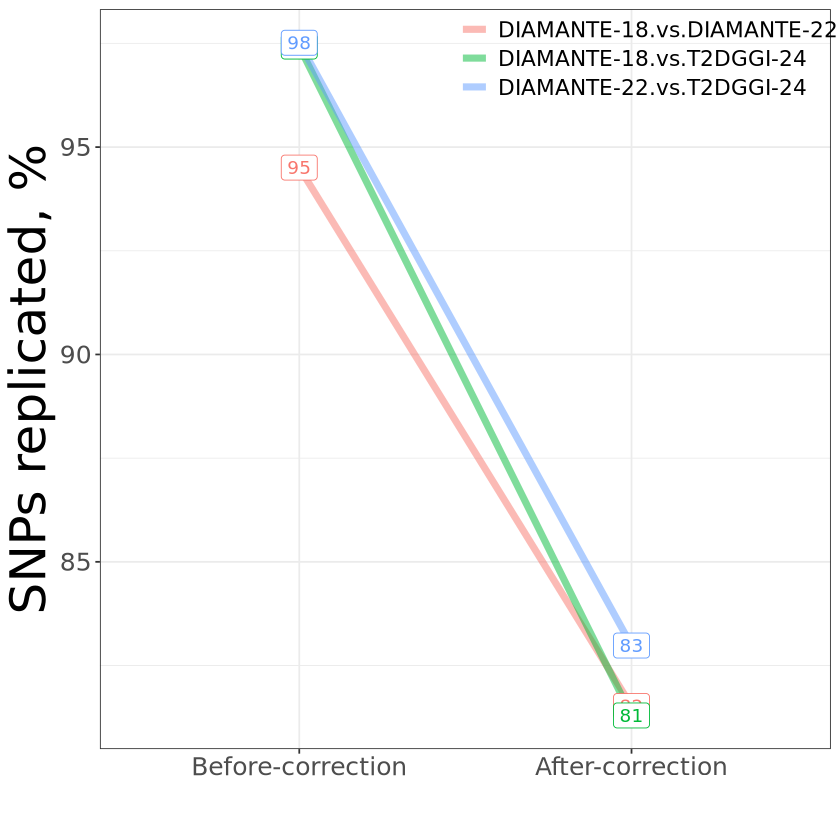

In [23]:
#plotting the trend
lambda_values <- c(replication100_unadj, replication101_unadj, replication102_unadj, replication100_adj, replication101_adj, replication102_adj)
trend.plot <- data.frame(lambda_values, c("Before-correction","Before-correction","Before-correction","After-correction", "After-correction", "After-correction"), c("DIAMANTE-18.vs.DIAMANTE-22", "DIAMANTE-18.vs.T2DGGI-24", "DIAMANTE-22.vs.T2DGGI-24"), c(1832100, 2710147, 2745987))
colnames(trend.plot) <- c("%-SNPs-replicated", "group_var", "studies", "total_sample_size")
trend.plot$group_var <- factor(trend.plot$group_var, levels=c("Before-correction","After-correction"))
trend.plot
ggplot(trend.plot, aes(x = group_var, y = `%-SNPs-replicated`, col = studies, group = studies)) +
  geom_line(size = 2, alpha = 0.5, show.legend = T) +
  geom_label(aes(label = round(`%-SNPs-replicated`)), show_guide = F) +
  ylab("SNPs replicated, %") +
  xlab("") + theme_bw() +
  theme(axis.text = element_text(size = 15), legend.position = c(0.75, 0.94), legend.text = element_text(size = 13), legend.title = element_blank(), axis.title = element_text(size = 30), legend.key = element_blank(), legend.background = element_blank())
plot1 <- ggplot(trend.plot, aes(x = group_var, y = `%-SNPs-replicated`, col = studies, group = studies)) +
  geom_line(size = 2, alpha = 0.5, show.legend = T) +
  geom_label(aes(label = round(`%-SNPs-replicated`)), show_guide = F) +
  ylab("SNPs replicated, %") +
  xlab("") + theme_bw() +
  theme(axis.text = element_text(size = 15), legend.position = c(0.75, 0.94), legend.text = element_text(size = 13), legend.title = element_blank(), axis.title = element_text(size = 30), legend.key = element_blank(), legend.background = element_blank())

# pdf("/lustre/groups/itg/teams/zeggini/users/archit.singh/lambda/plots_for_manuscript/Figure_3.pdf")
# print(plot1)     # Plot 1 --> in the first page of PDF
# dev.off() 

In [24]:
fwrite(trend.plot, "/lustre/groups/itg/teams/zeggini/users/archit.singh/lambda/plots_for_manuscript/ldsr_values.txt", sep = "\t")